In [1]:
import numpy as np
from matplotlib import pyplot as plt
import re
import glob

In [2]:
# !/home/kaor/.conda/envs/mmdet/bin/python -m pip install latex

In [3]:
def read_log(path):
    with open(path, 'r') as file:
        log = file.read()
    epoch_pattern = re.compile(r"The time for epoch (\d+)")
    Recall_pattern = re.compile(r"Recall: (\d+\.\d+)*")
    NDCG_pattern = re.compile(r"NDCG: (\d+\.\d+)*")

    # Extract metrics for each epoch
    epochs = epoch_pattern.findall(log)
    Recall = Recall_pattern.findall(log)
    NDCG = NDCG_pattern.findall(log)
    return np.array([epochs,Recall,NDCG]).astype(float)
    

In [4]:
num= [300,500,750]
data = [f"./logs/ultragcn_amazonbooks_m1-{row}.log" for row in num]
sorted(data)
results = [read_log(row) for row in data]
best = read_log("../UltraGCN2/amazon.log")

In [5]:
num= [500,750,1000,2000,3000]
data2 = [f"./logs/ultragcn_amazonbooks_m1-{row}-pre.log" for row in num]
sorted(data2)
results2 = [read_log(row) for row in data2]

In [6]:
u_r = [0.0680,0.06839,0.06878,0.068183]
u_N = [0.0556,0.0557,0.0563,0.0558]
u_n = [500,1000,2000,3000]
len(u_r),len(u_n)

(4, 4)

[[0.06845, 500], [0.06883, 750], [0.06906, 1000], [0.0694, 2000], [0.06823, 3000]]
[[0.0558, 500], [0.05625, 750], [0.05636, 1000], [0.05682, 2000], [0.05599, 3000]]


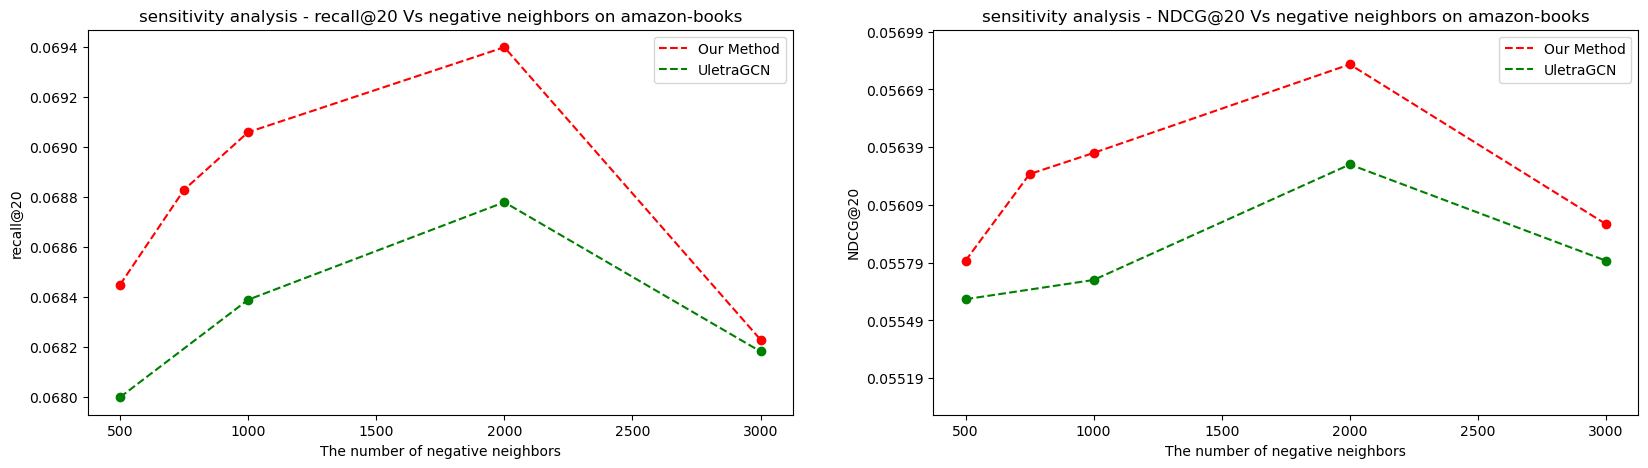

In [15]:
# plt.style.use('bmh')
import matplotlib.pyplot as plt
# import scienceplots

plt.figure(figsize=[20,5])
plt.subplot(121)
plt.title("sensitivity analysis - recall@20 Vs negative neighbors on amazon-books")
stop = 0
start = 100
arr = []
for i,result in enumerate(results):
    arr.append([result[1].max(),int(data[i].split("-")[1].split(".")[0])])
    # plt.scatter(int(data[i].split("-")[1].split(".")[0]),result[1].max(),c="blue")
    # if result[1].max()>stop:
    #     stop = result[1].max()
    # if result[1].min()<start:
    #     start = result[1].min()
# plt.plot(np.array(arr)[:,1],np.array(arr)[:,0],"--",label="balance negative neighbors",c="blue")

arr2 = []
for i,result in enumerate(results2):
    arr2.append([result[1].max(),int(data2[i].split("-")[1].split(".")[0])])
    plt.scatter(int(data2[i].split("-")[1].split(".")[0]),result[1].max(),c="red")
    if result[1].max()>stop:
        stop = result[1].max()
    if result[1].min()<start:
        start = result[1].min()
        
# plt.plot(np.array(arr2)[:,1],np.array(arr2)[:,0],"--",label="balance negative neighbors",c="red")
print(arr2)
plt.plot(np.array(arr2)[:,1],np.array(arr2)[:,0],"--",label="Our Method",c="red")
plt.scatter(u_n,u_r,c="green")
plt.plot(u_n,u_r,"--",label = "UletraGCN",c="green")
plt.xlabel('The number of negative neighbors') 
plt.ylabel('recall@20')
# plt.yticks(np.arange(start,stop+0.0003, 0.0003))
# plt.ylim([0.0678, 0.0697])
plt.legend()



plt.subplot(122)
plt.title("sensitivity analysis - NDCG@20 Vs negative neighbors on amazon-books")
stop = 0
start = 100
arr = []
for i,result in enumerate(results):
    arr.append([result[2].max(),int(data[i].split("-")[1].split(".")[0])])
#     plt.scatter(int(data[i].split("-")[1].split(".")[0]),result[2].max(),c="blue")
#     if result[2].max()>stop:
#         stop = result[2].max()
#     if result[2].min()<start:
#         start = result[2].min()
# plt.plot(np.array(arr)[:,1],np.array(arr)[:,0],"--",label="balance negative neighbors",c="blue")

arr2 = []
for i,result in enumerate(results2):
    arr2.append([result[2].max(),int(data2[i].split("-")[1].split(".")[0])])
    plt.scatter(int(data2[i].split("-")[1].split(".")[0]),result[2].max(),c="red")
    if result[2].max()>stop:
        stop = result[2].max()
    if result[2].min()<start:
        start = result[2].min()

plt.plot(np.array(arr2)[:,1],np.array(arr2)[:,0],"--",label="Our Method",c="red")
print(arr2)
plt.scatter(u_n,u_N,c="green")
plt.plot(u_n,u_N,"--",label = "UletraGCN",c="green")

plt.xlabel('The number of negative neighbors') 
plt.ylabel('NDCG@20')
plt.yticks(np.arange(start,stop+0.0005, 0.0003))
plt.ylim([0.055, 0.057])
plt.legend()

In [14]:
arr

[[0.05547, 300], [0.05572, 500], [0.05567, 750]]

In [13]:
np.array(arr2)[:,1],np.array(arr2)[:,0]

(array([ 500.,  750., 1000., 2000., 3000.]),
 array([0.0558 , 0.05625, 0.05636, 0.05682, 0.05599]))

In [11]:
ultera = read_log("../UltraGCN2/ultragcn_amazonbooks_m1.log")

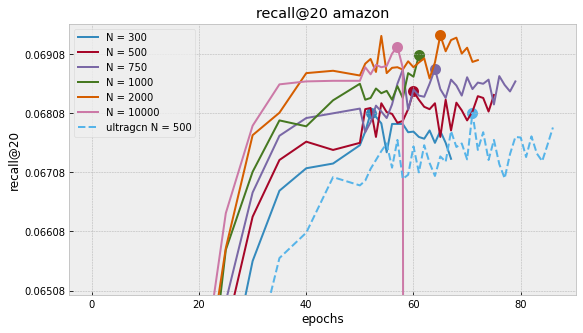

In [496]:
plt.style.use('bmh')
plt.figure(figsize=[20,5])
plt.subplot(121)
plt.title("recall@20 amazon")
stop = 0
start = 100
for i,result in enumerate(results2):
    plt.plot(result[0],result[1],label = f"N = {num[i]}")
    plt.scatter(result[0][result[1].argmax()],result[1].max(),linewidths=5)
    if result[1].max()>stop:
        stop = result[1].max()
    if result[1].min()<start:
        start = result[1].min()
plt.plot(ultera[0],ultera[1],"--",label = "ultragcn N = 500")
plt.scatter(ultera[0][ultera[1].argmax()],ultera[1].max(),linewidths=5)
plt.xlabel('epochs') 
plt.ylabel('recall@20')
plt.yticks(np.arange(start,stop+0.001, 0.001))
plt.ylim([0.065, 0.0696])
plt.legend()

# plt.subplot(122)
# plt.title("NDCG@20 amazon")
# plt.plot(results_our2[0],results_our2[2],label = "Ours N = 1500")
# plt.plot(results[0],results[2],label = "ultragcn")
# plt.plot(results_our[0],results_our[2],label = "Ours N = 150")
# plt.xlabel('epochs') 
# plt.ylabel('recall@20')
# plt.yticks(np.arange(min(results_our[2]), max(results_our[2])+0.005, 0.005))
# # plt.ylim([0.15, 0.19])
# plt.legend()

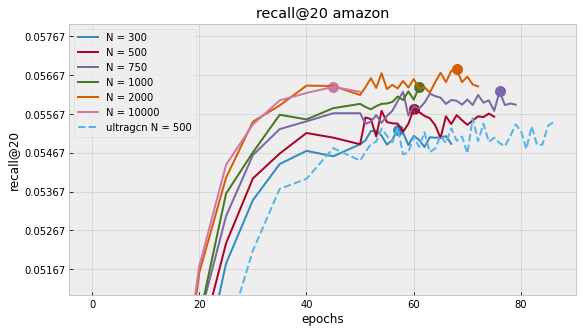

In [475]:
plt.style.use('bmh')
plt.figure(figsize=[20,5])
plt.subplot(121)
plt.title("recall@20 amazon")
stop = 0
start = 100
for i,result in enumerate(results2):
    plt.plot(result[0],result[2],label = f"N = {num[i]}")
    plt.scatter(result[0][result[2].argmax()],result[2].max(),linewidths=5)
    if result[1].max()>stop:
        stop = result[1].max()
    if result[1].min()<start:
        start = result[1].min()
plt.plot(ultera[0],ultera[2],"--",label = "ultragcn N = 500")
plt.scatter(ultera[0][ultera[2].argmax()],ultera[1].max(),linewidths=5)
plt.xlabel('epochs') 
plt.ylabel('recall@20')
plt.yticks(np.arange(start,stop+0.001, 0.001))
plt.ylim([0.051, 0.058])
plt.legend()

# plt.subplot(122)
# plt.title("NDCG@20 amazon")
# plt.plot(results_our2[0],results_our2[2],label = "Ours N = 1500")
# plt.plot(results[0],results[2],label = "ultragcn")
# plt.plot(results_our[0],results_our[2],label = "Ours N = 150")
# plt.xlabel('epochs') 
# plt.ylabel('recall@20')
# plt.yticks(np.arange(min(results_our[2]), max(results_our[2])+0.005, 0.005))
# # plt.ylim([0.15, 0.19])
# plt.legend()

In [ ]:
results_our2 = read_log('../UltraGCN/gowalla_log.txt')
results = read_log('../UltraGCN/ultragcn_gowalla_m1.log')
results_our = read_log('./logs/ultragcn_gowalla_m1_N_1500.log')
plt.style.use('bmh')
plt.figure(figsize=[20,5])
plt.subplot(121)
plt.title("recall@20 gowalla")
plt.plot(results_our2[0],results_our2[1],label = "Ours N = 1500")
plt.plot(results[0],results[1],label = "ultragcn")
plt.plot(results_our[0],results_our[1],label = "Ours N = 150")
plt.xlabel('epochs') 
plt.ylabel('recall@20')
plt.yticks(np.arange(min(results_our[1]), max(results_our[1])+0.005, 0.005))
# plt.ylim([0.15, 0.19])
plt.legend()

plt.subplot(122)
plt.title("NDCG@20 gowalla")
plt.plot(results_our2[0],results_our2[2],label = "Ours N = 1500")
plt.plot(results[0],results[2],label = "ultragcn")
plt.plot(results_our[0],results_our[2],label = "Ours N = 150")
plt.xlabel('epochs') 
plt.ylabel('recall@20')
plt.yticks(np.arange(min(results_our[2]), max(results_our[2])+0.005, 0.005))
# plt.ylim([0.15, 0.19])
plt.legend()

# plt.subplot(222)
# plt.title("NDCG@20 gowalla")
# plt.plot(results_our[:,0],results_our[:,4],label = "Ours")
# plt.plot(results[:,0],results[:,4],label = "ultragcn")
# plt.xlabel('epochs') 
# plt.ylabel('NDCG@20')
# plt.yticks(np.arange(min(results_our[:,4]), max(results_our[:,4])+0.005, 0.005))
# plt.ylim([0.13, 0.16])
# plt.legend()
# plt.subplot(223)
# plt.title("Precision@20 gowalla")
# plt.plot(results_our[:,0],results_our[:,2],label = "Ours")
# plt.plot(results[:,0],results[:,2],label = "ultragcn")
# plt.yticks(np.arange(min(results_our[:,2]), max(results_our[:,2])+0.005, 0.005))
# plt.ylim([0.04, 0.058])
# plt.xlabel('epochs') 
# plt.ylabel('Precision@20')
# plt.legend()
# plt.subplot(224)
# plt.title("f1_score@20 gowalla")
# plt.plot(results_our[:,0],results_our[:,3],label = "Ours")
# plt.plot(results[:,0],results[:,3],label = "ultragcn")
# plt.yticks(np.arange(min(results_our[:,3]), max(results_our[:,3])+0.005, 0.005))
# plt.ylim([0.04, 0.089])
# plt.xlabel('epochs') 
# plt.ylabel('f1_score@20')


plt.legend()

In [ ]:
with open('ultragcn_amazonbooks_m1.log', 'r') as file:
    text = file.read()
# Regular expression pattern to match epoch number and recall value
pattern = r'epoch\s+(\d+).*?Recall:\s*(\d+\.\d+).*?Precision:\s*(\d+\.\d+).*?F1-score:\s*(\d+\.\d+).*?NDCG:\s*(\d+\.\d+)'
matches = re.findall(pattern, text, re.DOTALL)
results = []
for match in matches:
    epoch_num, recall_value, precision_value, f1_score_value, ndcg_value = match
    results.append([epoch_num, recall_value, precision_value, f1_score_value, ndcg_value])
results = np.array(results).astype(float)
results.shape

In [16]:
with open('amazon.log', 'r') as file:
    text = file.read()
# Regular expression pattern to match epoch number and recall value
pattern = r'epoch\s+(\d+).*?Recall:\s*(\d+\.\d+).*?Precision:\s*(\d+\.\d+).*?F1-score:\s*(\d+\.\d+).*?NDCG:\s*(\d+\.\d+)'
matches = re.findall(pattern, text, re.DOTALL)
results_our = []
for match in matches:
    epoch_num, recall_value, precision_value, f1_score_value, ndcg_value = match
    results_our.append([epoch_num, recall_value, precision_value, f1_score_value, ndcg_value])
results_our = np.array(results_our).astype(float)
results_our.shape

(15, 5)

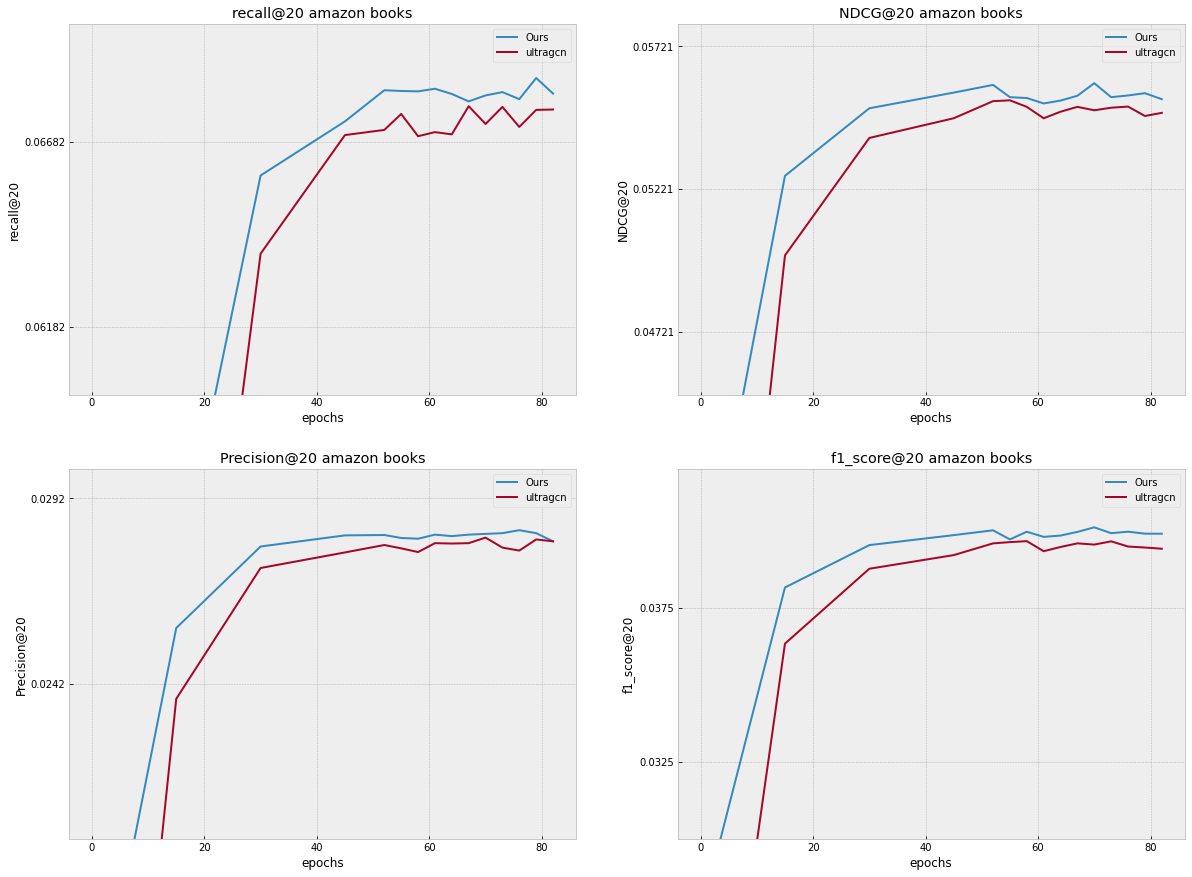

In [23]:

plt.figure(figsize=[20,15])
plt.subplot(221)
plt.title("recall@20 amazon books")
plt.plot(results_our[:,0],results_our[:,1],label = "Ours")
plt.plot(results[:,0],results[:,1],label = "ultragcn")
plt.xlabel('epochs') 
plt.ylabel('recall@20')
plt.yticks(np.arange(min(results_our[:,1]), max(results_our[:,1])+0.005, 0.005))
plt.ylim([0.06, 0.07])
plt.legend()
plt.subplot(222)
plt.title("NDCG@20 amazon books")
plt.plot(results_our[:,0],results_our[:,4],label = "Ours")
plt.plot(results[:,0],results[:,4],label = "ultragcn")
plt.xlabel('epochs') 
plt.ylabel('NDCG@20')
plt.yticks(np.arange(min(results_our[:,4]), max(results_our[:,4])+0.005, 0.005))
plt.ylim([0.045, 0.058])
plt.legend()
plt.subplot(223)
plt.title("Precision@20 amazon books")
plt.plot(results_our[:,0],results_our[:,2],label = "Ours")
plt.plot(results[:,0],results[:,2],label = "ultragcn")
plt.yticks(np.arange(min(results_our[:,2]), max(results_our[:,2])+0.005, 0.005))
plt.ylim([0.02, 0.03])
plt.xlabel('epochs') 
plt.ylabel('Precision@20')
plt.legend()
plt.subplot(224)
plt.title("f1_score@20 amazon books")
plt.plot(results_our[:,0],results_our[:,3],label = "Ours")
plt.plot(results[:,0],results[:,3],label = "ultragcn")
plt.yticks(np.arange(min(results_our[:,3]), max(results_our[:,3])+0.005, 0.005))
plt.ylim([0.03, 0.042])
plt.xlabel('epochs') 
plt.ylabel('f1_score@20')


plt.legend()